# Pandas

##### --Imports--

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### --Read CSV File--

In [199]:
df_GOOG = pd.read_csv("./data/GOOG.csv", index_col='Date', parse_dates=True, 
                        usecols = ['Date','Adj Close'], na_values=['nan'])
print (df_GOOG.head(5))

             Adj Close
Date                  
2012-09-10  349.076569
2012-09-11  344.802582
2012-09-12  344.150055
2012-09-13  351.701721
2012-09-14  353.514954


##### --Plot Data--

In [200]:
#df_GOOG['Adj Close'].plot()
#plt.show()

##### --Create Empty DataFrame--

In [201]:
#dates = pd.date_range('2012-09-10', '2017-09-10')
#df = pd.DataFrame(index=dates)
#print (df.head(5))

##### --Read & Join More Stocks--

In [202]:
def get_data(symbols, df_date_range):
    df = pd.DataFrame(index=df_date_range)
    for symbol in symbols:
        df_temp = pd.read_csv("./data/{}.csv".format(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date','Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        df = df.join(df_temp,sort=True)
        df = df.dropna()
        
    return df

In [203]:
dates = pd.date_range('2012-09-10', '2017-09-10')
df = get_data(['GOOG','AMZN','FB','AAPL'], dates)
print (df.head(5))

                  GOOG        AMZN         FB       AAPL
2012-09-10  349.076569  257.089996  18.809999  85.542564
2012-09-11  344.802582  255.669998  19.430000  85.265068
2012-09-12  344.150055  255.630005  20.930000  86.452538
2012-09-13  351.701721  260.239990  20.709999  88.155037
2012-09-14  353.514954  261.269989  22.000000  89.226341


##### --Data Slicing--

In [204]:
#Slice by row range(dates) using DataFrame.loc[]
#print (df.loc['2012-05-05':'2013-05-20'])

In [205]:
#Slice by columns(symbols)
#print (df[['GOOG','AAPL']])

In [206]:
#Slice by row and column
#print (df.loc['2013-05-09':'2014-05-20', ['GOOG','AAPL']])

##### --Ploting Multiple Stocks--

In [215]:
def plot_data(dataFrame, title="Stock Prices", xlabel="Date", ylabel="Price"):
    ax = dataFrame.plot(title=title, figsize=(10,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [208]:
def plot_selected(dataFrame, columns, start_index, end_index):
    plot_data(dataFrame.loc[start_index:end_index, columns], title="Selected prices")

In [209]:
#plot_selected(df, ['AMZN','FB'], '2013-03-23', '2016-06-13')

##### --Normalising Data--

In [210]:
def normalise_data(dataFrame):
    return dataFrame/dataFrame.iloc[0]

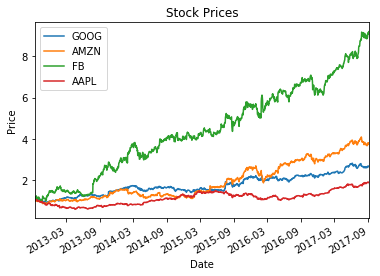

In [211]:
plot_data(normalise_data(df))

##### --Global Statistics--

In [212]:
#Compute Global Statistics for each Stock
print ("Mean:\n", df.mean())
print ("\nMedian:\n",df.median())
print ("\nStd:\n", df.std())

Mean:
 GOOG    613.221661
AMZN    503.815176
FB       83.879308
AAPL     97.822777
dtype: float64

Median:
 GOOG    573.899353
AMZN    390.485000
FB       79.814999
AAPL     97.679317
dtype: float64

Std:
 GOOG    164.702018
AMZN    235.544100
FB       40.395607
AAPL     27.210544
dtype: float64


### Time Series Calculation

##### --Bollinger Bands--

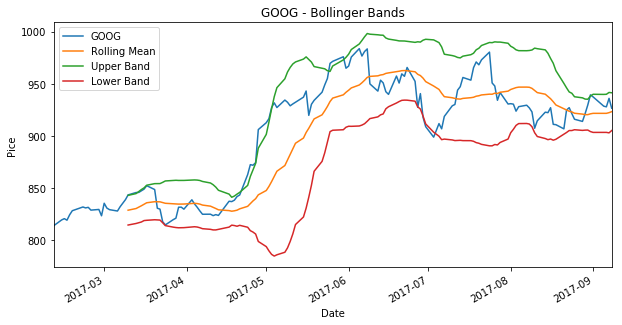

In [213]:
#Bollinger Bands
#######################################################################################################################
def get_rolling_mean(df, window):
    return pd.Series.rolling(df,window=window).mean()
    
def get_rolling_std(df, window):
    return pd.Series.rolling(df,window=window).std()
    
def get_bollinger_bands(rMean, rStd, numStd):
    upper_band = rMean + rStd * numStd
    lower_band = rMean - rStd * numStd
    return upper_band, lower_band
#######################################################################################################################

dates = pd.date_range('2017-02-10', '2017-09-10')
df = get_data(['GOOG'], dates)

#1. Compute Rolling Mean
rMean = get_rolling_mean(df['GOOG'], 20)

#2. Compute Rolling Std
rStd = get_rolling_std(df['GOOG'], 20)

#3. Conpute Upper and Lower bands
bUpper, bLower = get_bollinger_bands(rMean, rStd, 2) 

ax = df['GOOG'].plot(title='GOOG - Bollinger Bands', label='GOOG', grid=True, figsize=(10,5))
rMean = rMean.plot(label='Rolling Mean', ax=ax)
bUpper = bUpper.plot(label='Upper Band', ax=ax)
bLower = bLower.plot(label='Lower Band', ax=ax)

ax.set_xlabel('Date')
ax.set_ylabel('Pice')
#ax.grid(True)
ax.legend(loc='upper left')
plt.show()

##### --Daily Returns--

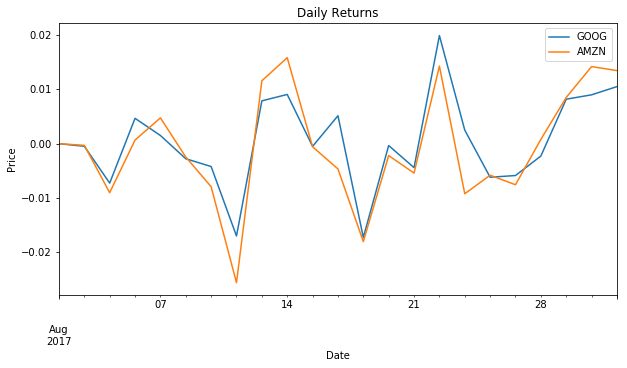

In [218]:
#Daily Returns
#######################################################################################################################
def get_daily_returns(df):
    df_daily_returns = (df / df.shift(1)) - 1
    df_daily_returns[0:1] = 0
    return df_daily_returns
#######################################################################################################################

dates = pd.date_range('2017-08-01', '2017-08-31')
df = get_data(['GOOG','AMZN'], dates)
df = get_daily_returns(df)
plot_data(df, 'Daily Returns')
